Libraries imported successfully.
Dataset loaded successfully.

Starting data cleaning...
Data cleaning complete. Rows with missing values have been removed.

Creating visualizations to understand the data...


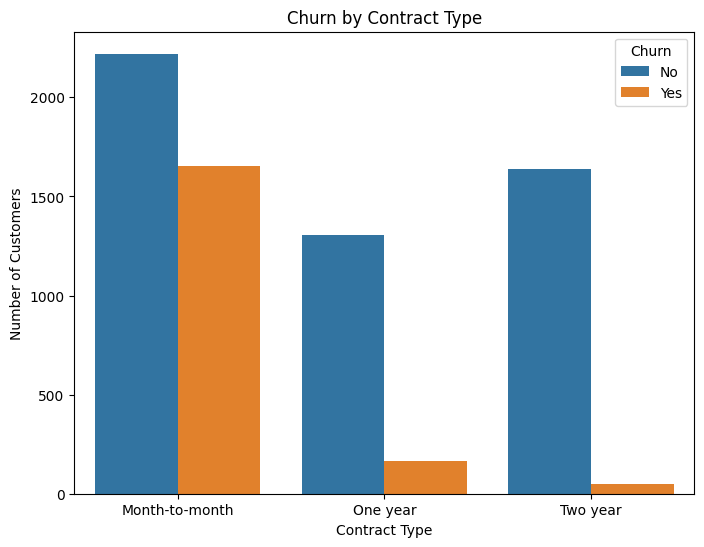

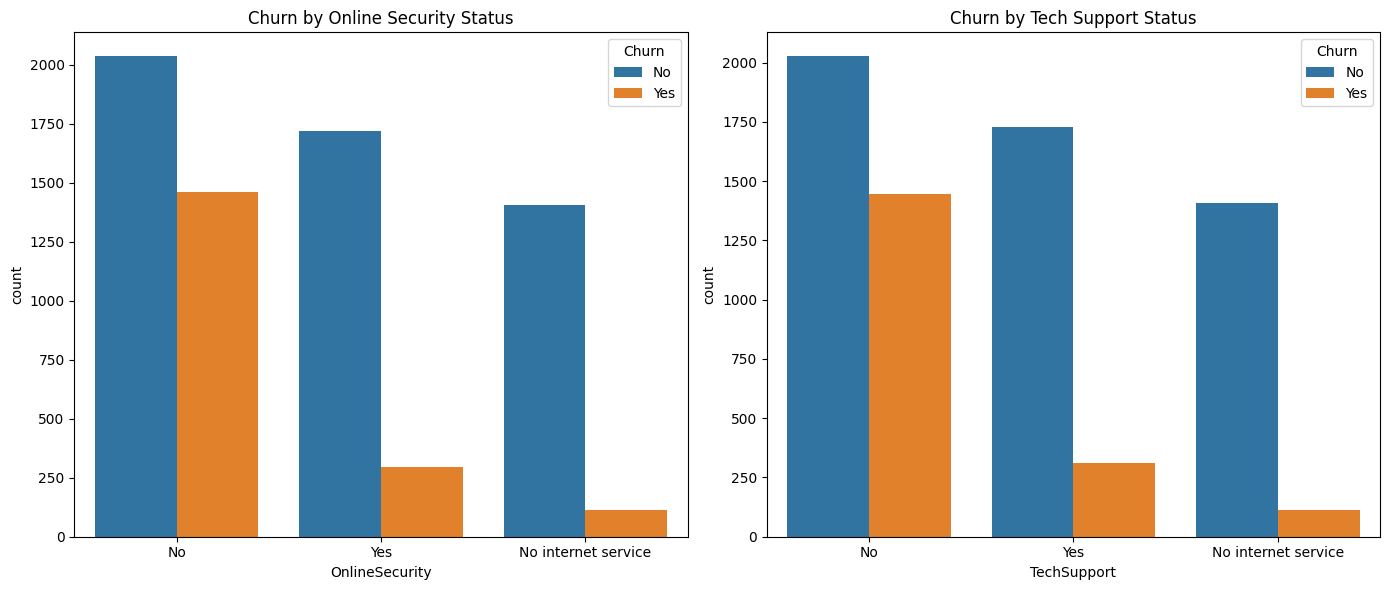

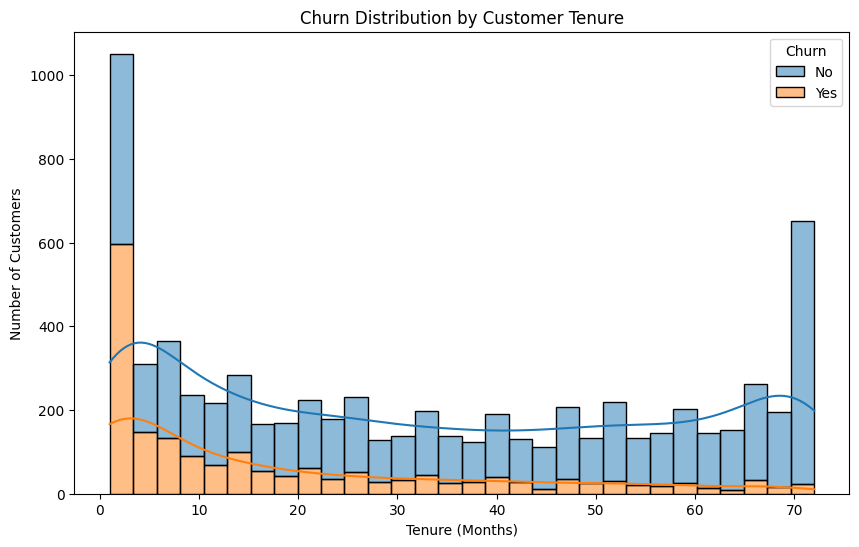


--- End of Step 3 ---


In [ ]:

# Import all necessary libraries for this step
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Load the dataset from the 'data' folder
try:
    df = pd.read_csv('data/WA_Fn-UseC_-Telco-Customer-Churn.csv')
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("ERROR: Dataset file not found. Make sure 'WA_Fn-UseC_-Telco-Customer-Churn.csv' is in the 'data' folder.")


# --- Action 1: Fix Data Type and Handle Missing Values ---
print("\nStarting data cleaning...")

# The 'TotalCharges' column should be numeric, but it's an 'object' type.
# We convert it, and any values that can't be converted (like empty spaces) become 'NaN'.
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Now we remove the few rows that have these missing values.
df.dropna(inplace=True)
print("Data cleaning complete. Rows with missing values have been removed.")


# --- Action 2: Visualize Churn Patterns ---
print("\nCreating visualizations to understand the data...")

# Visualization 1: Churn by Contract Type
# This helps us see if contract length affects customer loyalty.
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Contract', hue='Churn')
plt.title('Churn by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Number of Customers')
plt.legend(title='Churn')
plt.show()


# Visualization 2: Churn by Key Services
# Do customers with protective services like Online Security and Tech Support churn less?
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6)) # Create a figure with 2 subplots

sns.countplot(ax=axes[0], data=df, x='OnlineSecurity', hue='Churn')
axes[0].set_title('Churn by Online Security Status')

sns.countplot(ax=axes[1], data=df, x='TechSupport', hue='Churn')
axes[1].set_title('Churn by Tech Support Status')

plt.tight_layout() # Adjusts plot to prevent labels overlapping
plt.show()


# Visualization 3: Churn by Customer Tenure
# How does the length of time a customer has been with the company affect churn?
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='tenure', hue='Churn', multiple='stack', bins=30, kde=True)
plt.title('Churn Distribution by Customer Tenure')
plt.xlabel('Tenure (Months)')
plt.ylabel('Number of Customers')
plt.show()

print("\n--- End of Step 3 ---")

In [2]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

In [ ]:

# COMPLETE CODE FOR STEP 4: FEATURE PREPROCESSING

# Import all necessary libraries for this step
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

print("Libraries imported successfully.")

# --- Reload and Re-clean Data for a Fresh Start ---
# This ensures this cell can be run independently
df = pd.read_csv('data/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(inplace=True)
df.drop('customerID', axis=1, inplace=True)


# Action 1: Convert All Text Columns to Numbers 

# We will use one-hot encoding, which is the standard method.
# It converts each category in a text column into a new column with a 1 or 0.
# The `pd.get_dummies()` function does this automatically.
# We set `drop_first=True` to avoid redundant columns, which is a statistical best practice.
df_processed = pd.get_dummies(df, drop_first=True)

# The 'Churn_Yes' column was automatically created. Let's rename it to be clearer.
df_processed.rename(columns={'Churn_Yes': 'Churn'}, inplace=True)
print("All text columns have been converted to numbers using one-hot encoding.")


# --- Action 2: Separate Features (X) and Target (y) ---

# 'X' will contain all the columns the model will learn from.
X = df_processed.drop('Churn', axis=1)

# 'y' is the single column we want the model to predict.
y = df_processed['Churn']
print(f"Data separated into X (features) and y (target). Shape of X: {X.shape}")


# --- Action 3: Split Data into Training and Testing Sets ---

# We split our data so we can train the model on one part (training set)
# and test its performance on a part it has never seen before (testing set).
# test_size=0.2 means 20% of the data is reserved for testing.
# random_state=42 ensures we get the same split every time we run the code.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Data split into training set ({len(X_train)} rows) and testing set ({len(X_test)} rows).")


# --- Action 4: Feature Scaling ---

# This is a crucial industrial-standard step. We scale our numerical features
# so they all have a similar range. This helps the model learn more effectively.
scaler = StandardScaler()

# We fit the scaler ONLY on the training data to learn the scale.
X_train = scaler.fit_transform(X_train)

# We then use that same learned scale to transform the test data.
X_test = scaler.transform(X_test)
print("Numerical features have been scaled.")


print("\n--- End of Step 4: Data is now fully prepared for modeling ---")

Libraries imported successfully.
All text columns have been converted to numbers using one-hot encoding.
Data separated into X (features) and y (target). Shape of X: (7032, 30)
Data split into training set (5625 rows) and testing set (1407 rows).
Numerical features have been scaled.

--- End of Step 4: Data is now fully prepared for modeling ---


Libraries for modeling imported successfully.

--- Training Baseline Model: Logistic Regression ---

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

       False       0.83      0.89      0.86      1033
        True       0.62      0.52      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407

Displaying Confusion Matrix for Logistic Regression...


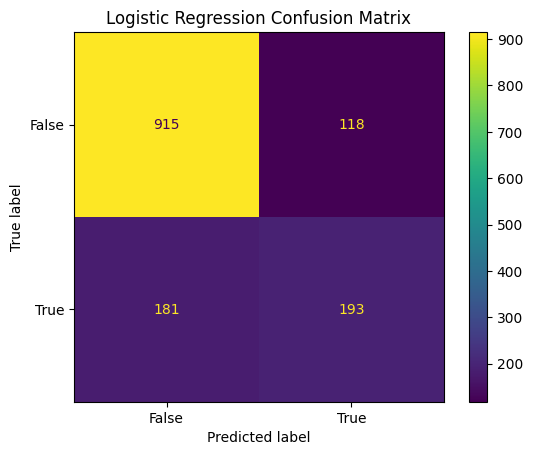


--- Training Advanced Model: XGBoost ---

Classification Report for XGBoost:
              precision    recall  f1-score   support

       False       0.83      0.87      0.85      1033
        True       0.59      0.50      0.54       374

    accuracy                           0.77      1407
   macro avg       0.71      0.69      0.69      1407
weighted avg       0.76      0.77      0.77      1407

Displaying Confusion Matrix for XGBoost...


/Users/apple/Projects_For_GitHub/Customer churn prediction/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:46:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


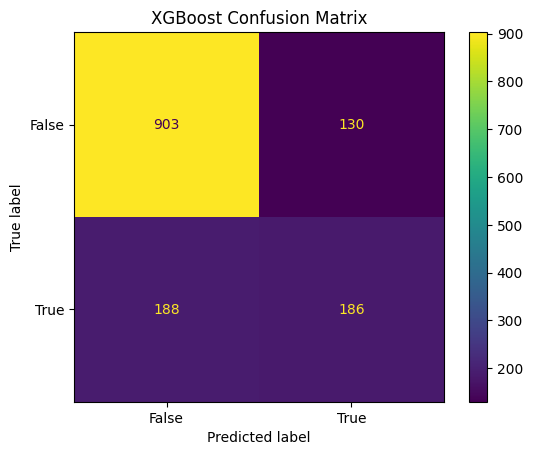


--- End of Step 5: Model training and evaluation complete ---


In [7]:

# COMPLETE CODE FOR STEP 5: MODEL TRAINING AND EVALUATION

# Import all necessary libraries for this step
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

print("Libraries for modeling imported successfully.")

# --- Action 1: Train and Evaluate a Baseline Model (Logistic Regression) ---
print("\n--- Training Baseline Model: Logistic Regression ---")

# Create an instance of the model
# random_state=42 ensures the model produces the same results every time
log_model = LogisticRegression(random_state=42, max_iter=1000)

# Train the model on the training data
log_model.fit(X_train, y_train)

# Make predictions on the unseen test data
y_pred_log = log_model.predict(X_test)

# Evaluate the model's performance
print("\nClassification Report for Logistic Regression:")
print(classification_report(y_test, y_pred_log))

# Visualize the confusion matrix
print("Displaying Confusion Matrix for Logistic Regression...")
ConfusionMatrixDisplay.from_estimator(log_model, X_test, y_test)
plt.title('Logistic Regression Confusion Matrix')
plt.show()


# --- Action 2: Train and Evaluate an Advanced Model (XGBoost) ---
print("\n--- Training Advanced Model: XGBoost ---")

# Create an instance of the XGBoost model
# XGBoost is a powerful algorithm often used for its high performance
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Train the model on the same training data
xgb_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the advanced model's performance
print("\nClassification Report for XGBoost:")
print(classification_report(y_test, y_pred_xgb))

# Visualize the confusion matrix
print("Displaying Confusion Matrix for XGBoost...")
ConfusionMatrixDisplay.from_estimator(xgb_model, X_test, y_test)
plt.title('XGBoost Confusion Matrix')
plt.show()

print("\n--- End of Step 5: Model training and evaluation complete ---")

Libraries for modeling and tuning imported successfully.

--- Tuning Logistic Regression ---
Best F1-Score (on validation set): 0.6078
Best Parameters: {'classifier__C': 10.0}

--- Tuning Random Forest ---
Best F1-Score (on validation set): 0.5893
Best Parameters: {'classifier__max_depth': 10, 'classifier__n_estimators': 200}

--- Tuning XGBoost ---


/Users/apple/Projects_For_GitHub/Customer churn prediction/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:51:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/apple/Projects_For_GitHub/Customer churn prediction/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:51:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/apple/Projects_For_GitHub/Customer churn prediction/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:51:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/apple/Projects_For_GitHub/Customer churn prediction/venv/lib/python3.13/site-packages/x

Best F1-Score (on validation set): 0.6024
Best Parameters: {'classifier__learning_rate': 0.05, 'classifier__max_depth': 3, 'classifier__n_estimators': 200}

--- Best Overall Model: Logistic Regression ---

Final Classification Report on Test Set:
              precision    recall  f1-score   support

       False       0.84      0.89      0.86      1033
        True       0.62      0.52      0.57       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407

Displaying Final Confusion Matrix...


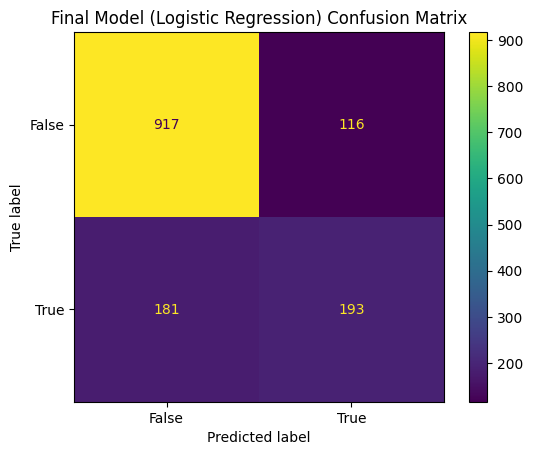


Best model (Logistic Regression) saved as 'final_churn_model.joblib'

--- End of Step 5: Model tuning and selection complete ---


In [8]:
# =================================================================
# COMPLETE CODE FOR STEP 5 (ADVANCED): HYPERPARAMETER TUNING
# =================================================================

# Import all necessary libraries for this step
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import pandas as pd

print("Libraries for modeling and tuning imported successfully.")

# --- Action 1: Define Models and Hyperparameter Grids ---

# We define the models we want to test
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
}

# We define the grid of hyperparameters to search for each model.
# These are like settings that can be tuned for better performance.
params = {
    'Logistic Regression': {
        'classifier__C': [0.1, 1.0, 10.0]
    },
    'Random Forest': {
        'classifier__n_estimators': [50, 100, 200],
        'classifier__max_depth': [None, 10, 20]
    },
    'XGBoost': {
        'classifier__n_estimators': [50, 100, 200],
        'classifier__learning_rate': [0.05, 0.1],
        'classifier__max_depth': [3, 5, 7]
    }
}

# --- Action 2: Perform Grid Search for Each Model ---

# We will store the results here
results = {}

# Loop through each model
for model_name, model in models.items():
    print(f"\n--- Tuning {model_name} ---")
    
    # We create a pipeline to apply scaling before the classifier
    from sklearn.pipeline import Pipeline
    pipeline = Pipeline(steps=[('scaler', StandardScaler()),
                               ('classifier', model)])
    
    # Use GridSearchCV to search for the best parameters
    # cv=5 means 5-fold cross-validation
    grid_search = GridSearchCV(pipeline, params[model_name], cv=5, scoring='f1', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    # Store the best performing model and its score
    results[model_name] = {
        'best_estimator': grid_search.best_estimator_,
        'best_score': grid_search.best_score_,
        'best_params': grid_search.best_params_
    }
    
    print(f"Best F1-Score (on validation set): {grid_search.best_score_:.4f}")
    print(f"Best Parameters: {grid_search.best_params_}")


# --- Action 3: Evaluate the Best Model on the Test Set ---

# Find the model with the highest validation score
best_model_name = max(results, key=lambda name: results[name]['best_score'])
best_model = results[best_model_name]['best_estimator']

print(f"\n--- Best Overall Model: {best_model_name} ---")

# Make predictions on the unseen test data
y_pred = best_model.predict(X_test)

# Evaluate the final model's performance
print("\nFinal Classification Report on Test Set:")
print(classification_report(y_test, y_pred))

# Visualize the final confusion matrix
print("Displaying Final Confusion Matrix...")
ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test)
plt.title(f'Final Model ({best_model_name}) Confusion Matrix')
plt.show()


# --- Save the best model for future use ---
import joblib
joblib.dump(best_model, 'final_churn_model.joblib')
print(f"\nBest model ({best_model_name}) saved as 'final_churn_model.joblib'")

print("\n--- End of Step 5: Model tuning and selection complete ---")

Libraries for modeling and tuning imported successfully.

--- Tuning Logistic Regression ---
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best F1-Score (on validation set): 0.5985
Best Parameters: {'classifier__C': 50.0}

--- Tuning Random Forest ---
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best F1-Score (on validation set): 0.5732
Best Parameters: {'classifier__max_depth': 10, 'classifier__min_samples_leaf': 1, 'classifier__n_estimators': 200}

--- Tuning XGBoost ---
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best F1-Score (on validation set): 0.5819
Best Parameters: {'classifier__learning_rate': 0.05, 'classifier__max_depth': 3, 'classifier__n_estimators': 300}

--- Best Overall Model after Deeper Tuning: Logistic Regression ---

Final Classification Report on Test Set:
              precision    recall  f1-score   support

       False       0.85      0.88      0.87      1033
        True       0.64      0.57      0.60       374

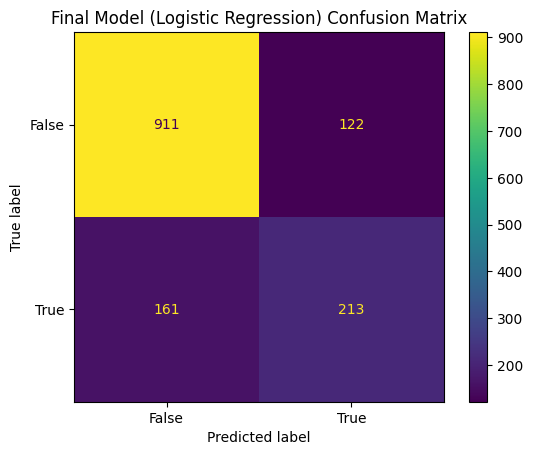


Best model (Logistic Regression) saved as 'final_churn_model_tuned.joblib'


In [9]:
# =================================================================
# COMPLETE CODE FOR STEP 5 (ENHANCED): DEEPER TUNING
# =================================================================

# Import all necessary libraries for this step
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np # Import numpy for safe division

print("Libraries for modeling and tuning imported successfully.")

# --- Action 1: Reload Data and Perform Feature Engineering ---

# Reload and re-clean data for a fresh start
df = pd.read_csv('data/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(inplace=True)
df.drop('customerID', axis=1, inplace=True)

# Feature Engineering: Create a new feature for tenure-to-monthly-charges ratio
# This might capture customers who get high value (long tenure) for their monthly cost
df['tenure_monthly_ratio'] = df['tenure'] / (df['MonthlyCharges'] + 1e-6) # Add small value to avoid division by zero

# --- Action 2: Preprocess the Data with the New Feature ---

# One-hot encode all categorical features
df_processed = pd.get_dummies(df, drop_first=True)
df_processed.rename(columns={'Churn_Yes': 'Churn'}, inplace=True)

# Separate features (X) and target (y)
X = df_processed.drop('Churn', axis=1)
y = df_processed['Churn']

# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) # Use stratify for imbalanced classes


# --- Action 3: Define Models and Expanded Hyperparameter Grids ---

models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000, solver='liblinear'),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42, eval_metric='logloss')
}

# Expanded parameter grids for a more thorough search
params = {
    'Logistic Regression': {
        'classifier__C': [1.0, 10.0, 50.0]
    },
    'Random Forest': {
        'classifier__n_estimators': [100, 200, 300],
        'classifier__max_depth': [10, 20, 30],
        'classifier__min_samples_leaf': [1, 2, 4]
    },
    'XGBoost': {
        'classifier__n_estimators': [100, 200, 300],
        'classifier__learning_rate': [0.01, 0.05, 0.1],
        'classifier__max_depth': [3, 5, 7]
    }
}


# --- Action 4: Perform Grid Search and Evaluate ---
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import joblib

results = {}

for model_name, model in models.items():
    print(f"\n--- Tuning {model_name} ---")
    
    pipeline = Pipeline(steps=[('scaler', StandardScaler()),
                               ('classifier', model)])
    
    grid_search = GridSearchCV(pipeline, params[model_name], cv=5, scoring='f1', n_jobs=-1, verbose=1)
    grid_search.fit(X_train, y_train)
    
    results[model_name] = {
        'best_estimator': grid_search.best_estimator_,
        'best_score': grid_search.best_score_,
        'best_params': grid_search.best_params_
    }
    
    print(f"Best F1-Score (on validation set): {grid_search.best_score_:.4f}")
    print(f"Best Parameters: {grid_search.best_params_}")


# --- Action 5: Evaluate the Best Overall Model ---
best_model_name = max(results, key=lambda name: results[name]['best_score'])
best_model = results[best_model_name]['best_estimator']

print(f"\n--- Best Overall Model after Deeper Tuning: {best_model_name} ---")

y_pred = best_model.predict(X_test)

print("\nFinal Classification Report on Test Set:")
print(classification_report(y_test, y_pred))

print("Displaying Final Confusion Matrix...")
ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test)
plt.title(f'Final Model ({best_model_name}) Confusion Matrix')
plt.show()

# Save the new best model
joblib.dump(best_model, 'final_churn_model_tuned.joblib')
print(f"\nBest model ({best_model_name}) saved as 'final_churn_model_tuned.joblib'")

In [10]:
import joblib

# 'X' is the DataFrame of features before splitting and scaling
# We save its column names
joblib.dump(X.columns, 'training_columns.joblib')

print("Training columns saved to 'training_columns.joblib'")

Training columns saved to 'training_columns.joblib'
